# Title: Heart Disease Prediction

`Author:` Abdul Muid 

`Date:` 05 Jan 2024

`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### Meta-Data (About Dataset)

### Context 

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.



| Column  | Description                                                      | Values (Categorical)                                     |
|---------|------------------------------------------------------------------|---------------------------------------------|
| id      | Unique id for each patient                                       |                                             |
| age     | Age of the patient in years                                      |                                           |
| origin  | Place of study                                                   |Cleveland, Hungary, Switzerland, VA Long Beach                                             |
| sex     | Male/Female                                                      |Male, Female                                             |
| cp      | Chest pain type                                                  | Typical Angina, Atypical Angina, Non-Anginal, Asymptomatic|
| trestbps| Resting blood pressure (in mm Hg on admission to the hospital)   |                                             |
| chol    | Serum cholesterol in mg/dl                                       |                                             |
| fbs     | Fasting blood sugar (> 120 mg/dl)                                |                                             |
| restecg | Resting electrocardiographic results                             | Normal, ST-T Abnormality, LV Hypertrophy    |
| thalach | Maximum heart rate achieved                                      |                                             |
| exang   | Exercise-induced angina (True/False)                             | True, False                                 |
| oldpeak | ST depression induced by exercise relative to rest               |                                             |
| slope   | Slope of the peak exercise ST segment                            |                                             |
| ca      | Number of major vessels (0-3) colored by fluoroscopy             | 0, 1, 2, 3                                  |
| thal    | Thalassemia                                                      | Normal, Fixed Defect, Reversible Defect    |
| num     | Predicted attribute                                              |0, 1, 2, 3, 4                                             |


In [692]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [693]:
df = pd.read_csv('../Datasets/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [695]:
df.shape

(920, 16)

### Summary Statistics

In [696]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### Correlation Matrix of Numeric Columns

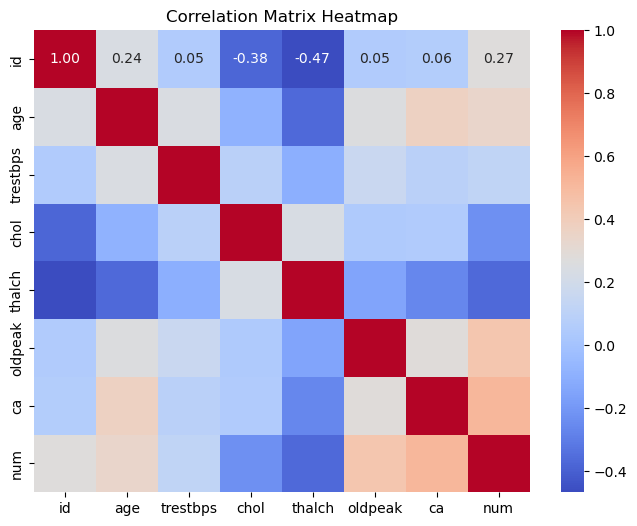

In [697]:
# This code selects columns of type float64 and then converts the resulting Index object to a list.
df_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist() 
correlation_matrix  = df[df_num].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Unique values in Categorical Columns 

In [698]:
for col in df.columns:
    if df[col].dtype == 'object':
        a = df[col].unique()
        print(a)

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
[True False nan]
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]


In [699]:
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [700]:
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

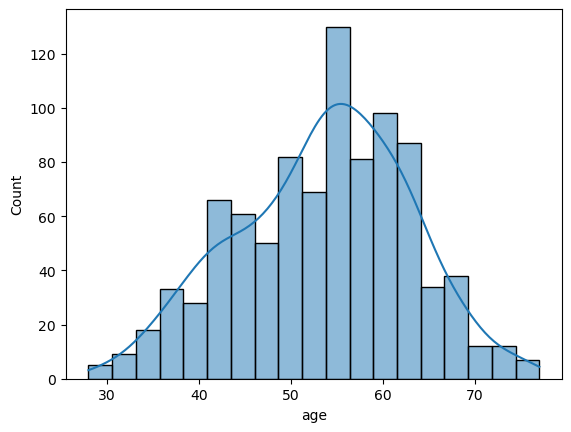

In [701]:
sns.histplot(df, x = 'age', kde= True)

In [702]:
a = df['age'].mode()[0]
b = df['age'].mean()
c = df['age'].median()

print(f"The Mode of Age is: {a},\nMean is {b}, \nand Median is {c}")

The Mode of Age is: 54,
Mean is 53.51086956521739, 
and Median is 54.0


In [703]:
fig = px.histogram(df, x = 'age', color='sex')
fig.update_layout(width=800, height=400, margin=dict(l=50, r=50, t=50, b=50))
fig.show()


In [704]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [705]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


<Axes: xlabel='dataset', ylabel='count'>

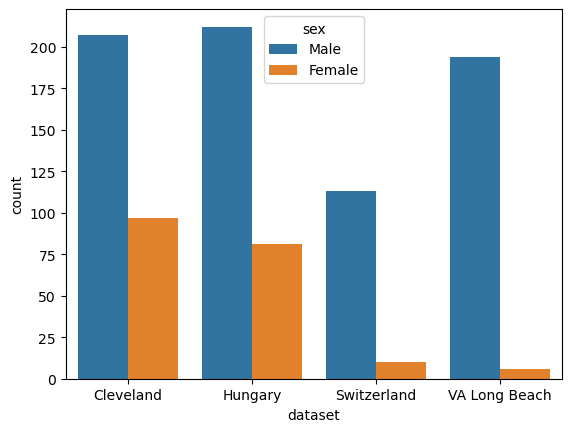

In [706]:
print(df.groupby('sex')['dataset'].value_counts())
sns.countplot(df, x = 'dataset', hue= 'sex')

In [707]:
print(f"Mean of Data set: {df.groupby('dataset')['age'].mean()}")
print('------------')
print(f"Median of Data set: {df.groupby('dataset')['age'].median()}")
print('------------')
print(f"Mode of Data set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean of Data set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
------------
Median of Data set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
------------
Mode of Data set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Lets explore chest pain (ca) column

In [708]:
fig1 = px.histogram(df, x = 'age', color = 'cp')
fig1.update_layout(width=800, height=400, margin=dict(l=50, r=50, t=50, b=50))

#### Lets Explore thalch column

In [709]:
df['thalch'].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [710]:
df['thalch'].corr(df['num'])

-0.3662653994442529

## *Dealing with Outliers*

In [712]:
df = df.drop('id', axis = 1)

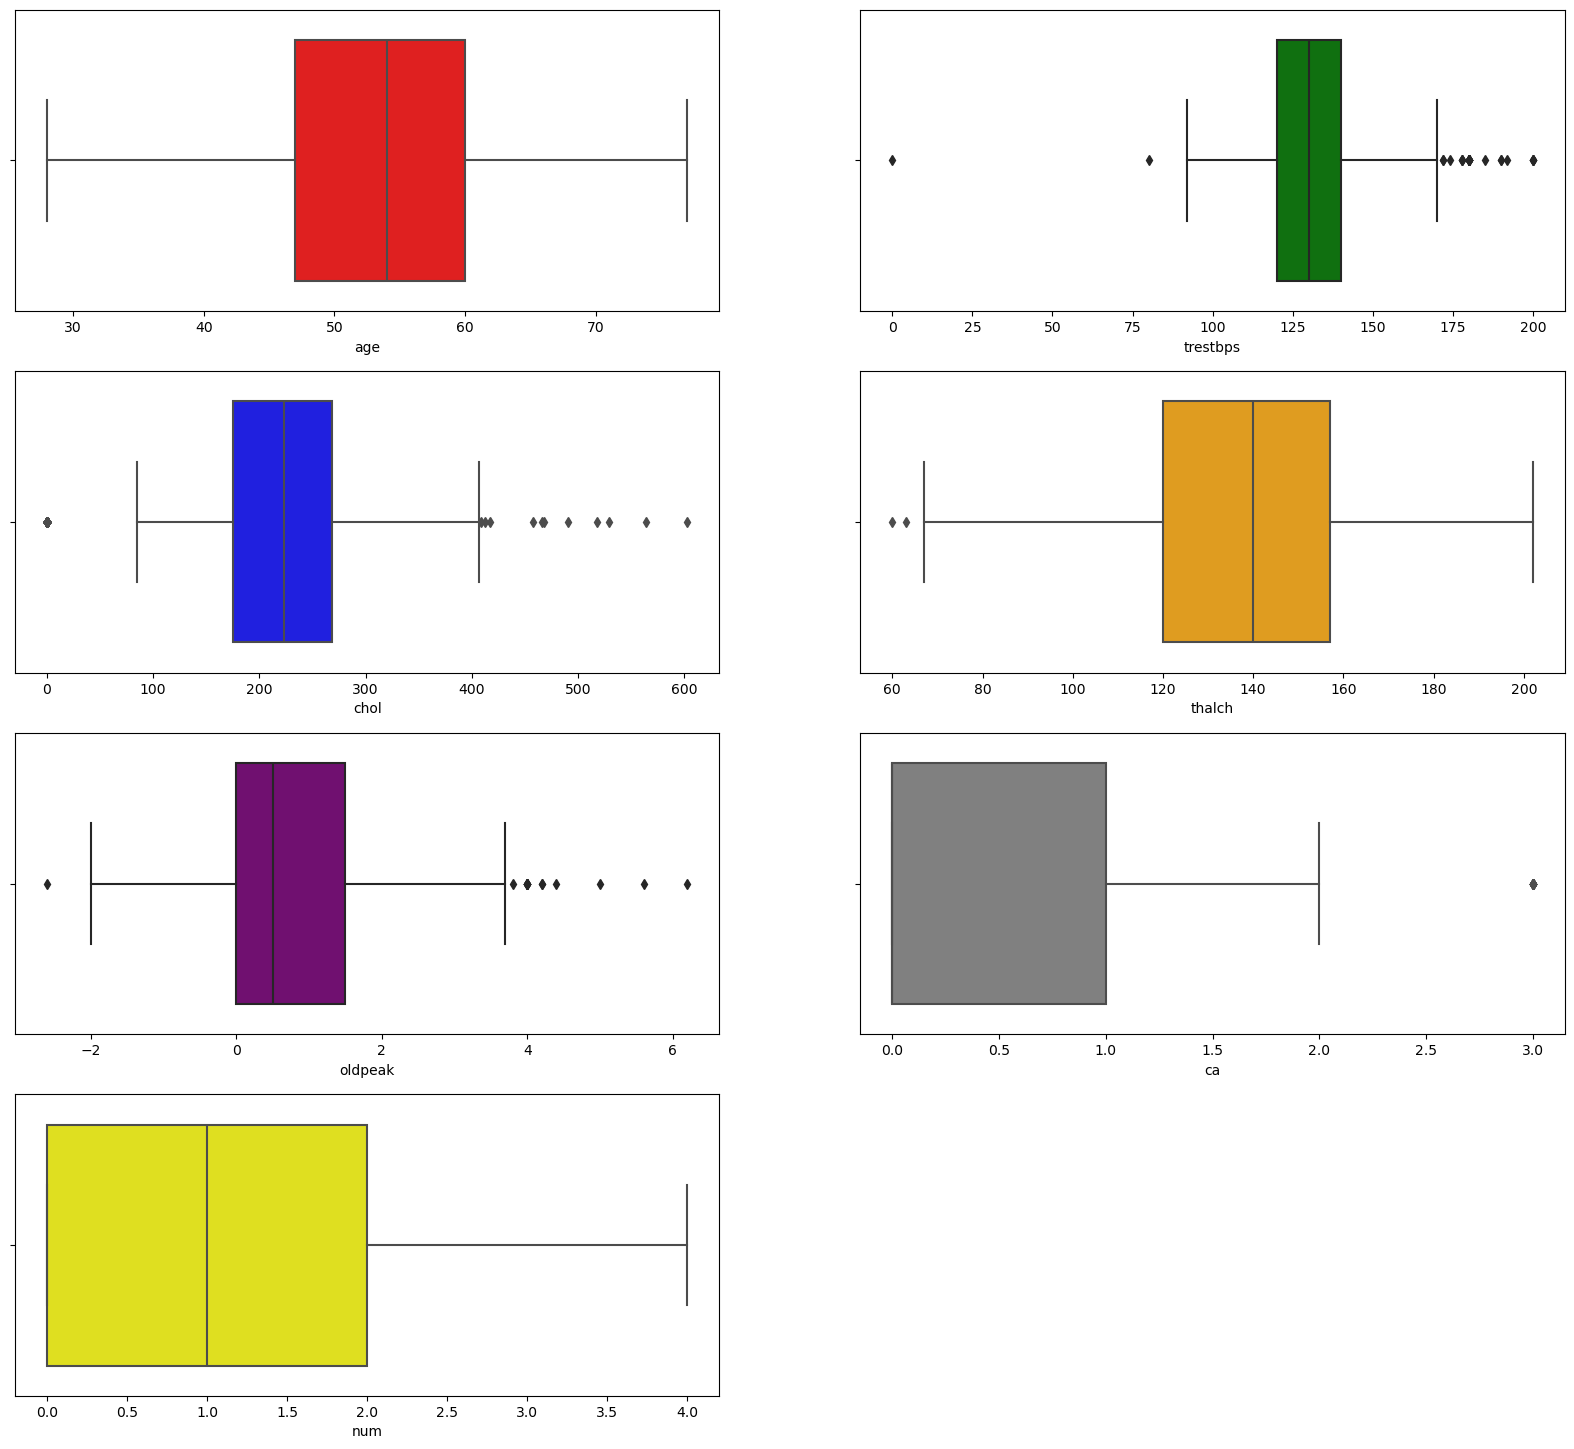

In [713]:
# Get the numerical columns
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']

plt.figure(figsize=(20, 18))

colors = ['red', 'green', 'blue','orange', 'purple', 'grey', 'yellow']

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[col], color = colors[i])
plt.show()

## *Data Distributions*

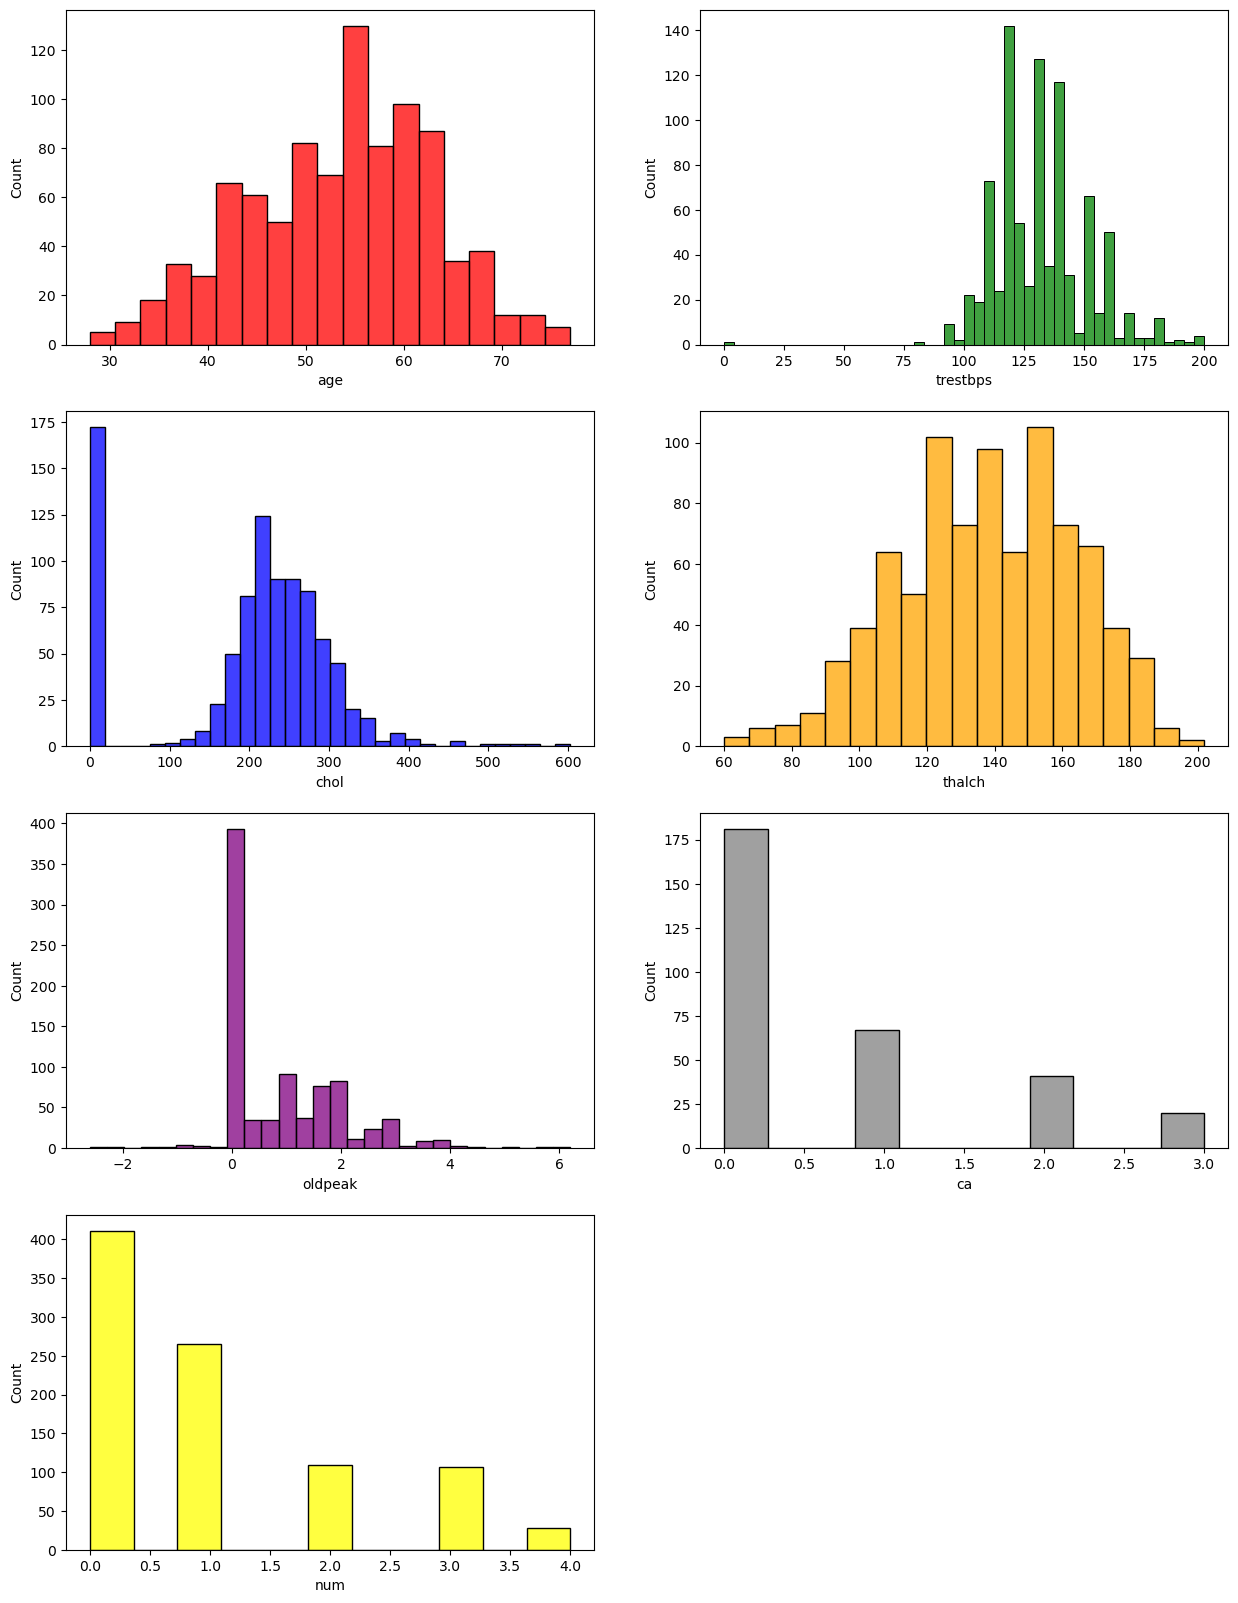

In [714]:
plt.figure(figsize=(15, 20))

colors = ['red', 'green', 'blue','orange', 'purple', 'grey', 'yellow']

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(x = df[col], color = colors[i])
plt.show()

In [715]:
# Interactive Box plots for Numeric Columns 

fig = px.box(df, y = numerical_columns, color_discrete_sequence=colors)
fig.update_layout(title = "Box Plots for Numeric Columns", height = 1000, width = 1000)
fig.show()

In [716]:
# there is an outlier in trestbps 

df[df['trestbps'] == 0]

# Lets remove this row
df = df[df['trestbps'] != 0]

### Checking Missing Values 

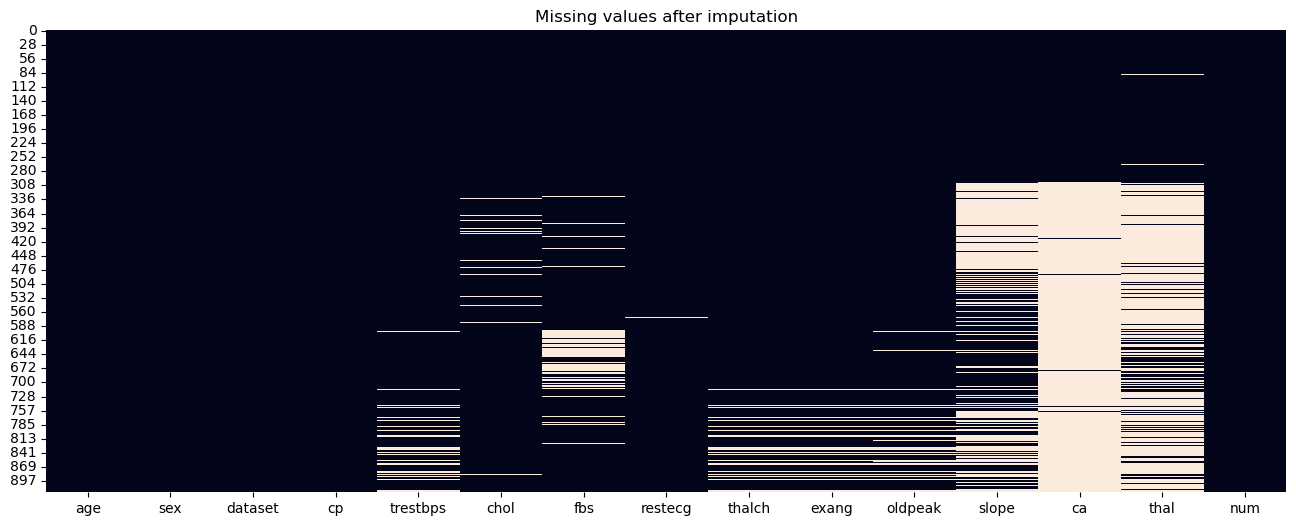

In [717]:
# create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

In [718]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.376496
thal        52.774755
slope       33.623504
fbs          9.793254
oldpeak      6.746464
trestbps     6.420022
thalch       5.984766
exang        5.984766
chol         3.264418
restecg      0.217628
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       919 non-null    int64  
 1   sex       919 non-null    object 
 2   dataset   919 non-null    object 
 3   cp        919 non-null    object 
 4   trestbps  860 non-null    float64
 5   chol      889 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   917 non-null    object 
 8   thalch    864 non-null    float64
 9   exang     864 non-null    object 
 10  oldpeak   857 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       919 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.9+ KB


In [720]:
# Impute Missing values through simple imputer

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_columns = ['fbs', 'exang', 'restecg']

df[cat_columns] = cat_imputer.fit_transform(df[cat_columns]) 

num_imputer = IterativeImputer(max_iter=10, random_state=42)
num_columns = ['oldpeak', 'trestbps', 'thalch', 'chol']

df[num_columns] = num_imputer.fit_transform(df[num_columns])

In [721]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.376496
thal        52.774755
slope       33.623504
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
fbs          0.000000
restecg      0.000000
thalch       0.000000
exang        0.000000
oldpeak      0.000000
num          0.000000
dtype: float64

### Lets impute the columns that have high percentage of missing values 

We will create 2 dataframes, one with missing values and the other with no missing values 

In [722]:
df_clean = df.dropna()
df_missing = df[df.isna().any(axis=1)]

In [723]:
percentage_distribution = df_clean['slope'].value_counts(normalize=True) * 100
percentage_distribution = percentage_distribution.round(2)
print(percentage_distribution)


slope
flat           46.49
upsloping      46.49
downsloping     7.02
Name: proportion, dtype: float64


In [724]:
df_clean.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


While training the model, we need to remove the columns with missing values in df_missing dataframe. 
This is because when we will predict the missing column the model will not ask for the missing value columns. 

If we train the model with columns that have missing values in df_missing, when we will try to predict, the model will ask for those columns. 

In [725]:
def predictions(target, drop_c):
    X = df_clean.drop(drop_c, axis = 1)
    y = df_clean[target]

    le = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    model = RandomForestClassifier()

    model.fit(X, y)
    
    # Perform k-fold cross-validation with k=5
    kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print("Scores for each fold:", scores)
    print("Mean score:", scores.mean())

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.plot(range(1,7), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
    plt.title('K-Fold Cross-Validation Results')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.0])
    plt.show()

    return model

Scores for each fold: [0.66       0.74       0.66       0.76       0.72       0.63265306]
Mean score: 0.6954421768707483


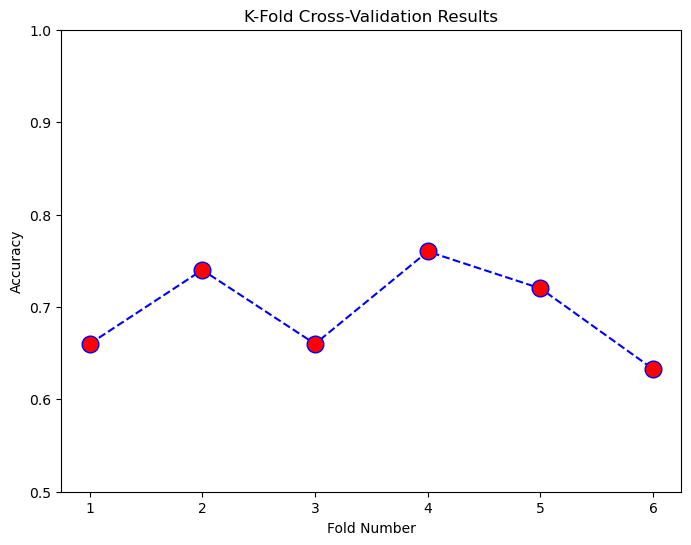

In [726]:
model_slope = predictions('slope', ['slope', 'thal', 'ca'])

Scores for each fold: [0.66       0.76       0.76       0.68       0.74       0.69387755]
Mean score: 0.7156462585034014


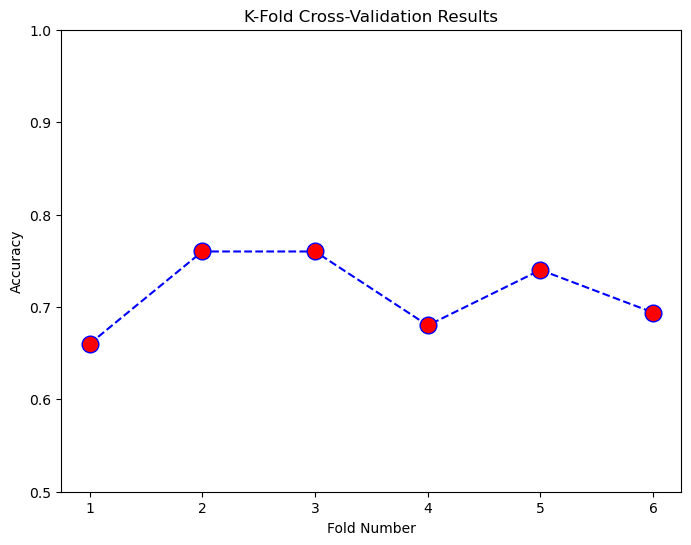

In [727]:
model_thal = predictions('thal', ['slope', 'thal', 'ca'])

Scores for each fold: [0.58       0.68       0.66       0.62       0.62       0.65306122]
Mean score: 0.6355102040816326


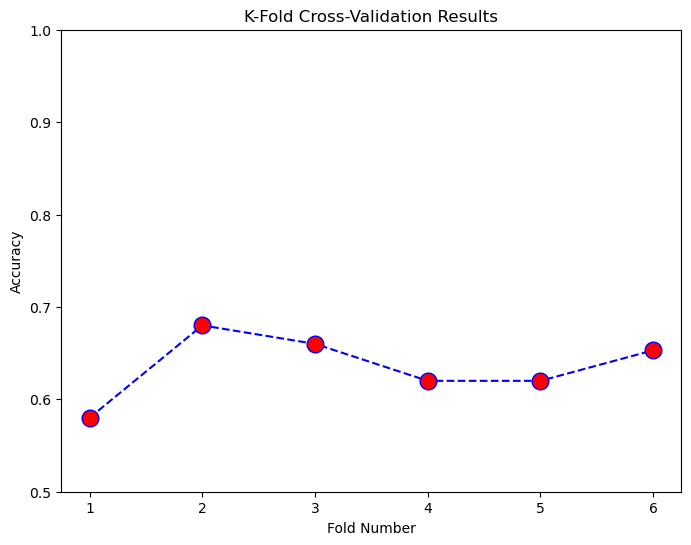

In [728]:
model_ca = predictions('ca', ['slope', 'thal', 'ca'])

### Our Models are ready, lets use them to predict the missing values 

In [731]:
df_missing.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          610
thal        485
num           0
dtype: int64

In [732]:
from sklearn.preprocessing import LabelEncoder

def predict_missing_values(df_missing, model, target_column, exclude_columns=[]):
    # Prepare encoded DataFrame
    df_encoded = df_missing.drop(exclude_columns + [target_column], axis=1, errors='ignore')

    # Label encode categorical columns
    le = LabelEncoder()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Predict missing values
    features_to_predict = df_encoded.drop([target_column], axis=1, errors='ignore')
    y_pred = model.predict(features_to_predict)
    
    # Replace missing values in the original DataFrame
    df_missing[target_column] = y_pred

# Usage:
predict_missing_values(df_missing, model_slope, 'slope', exclude_columns=['thal', 'ca'])


In [733]:
predict_missing_values(df_missing, model_thal, 'thal', exclude_columns=['ca', 'slope'])
predict_missing_values(df_missing, model_ca, 'ca', exclude_columns=['thal', 'slope'])

In [734]:
df_missing.isnull().sum() / len(df) * 100

age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

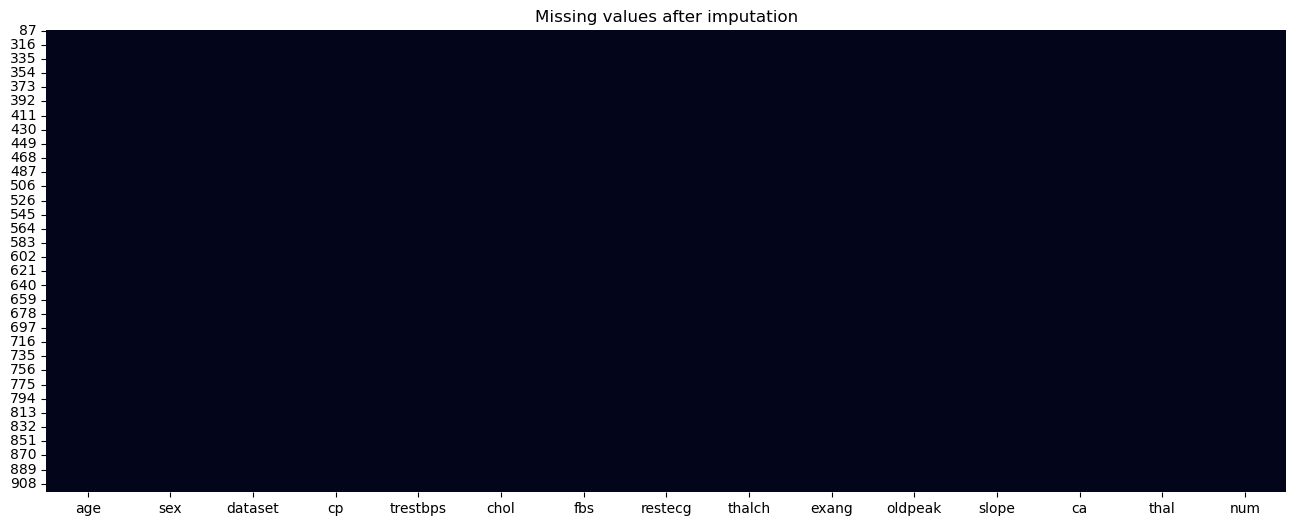

In [735]:
# create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df_missing.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

In [736]:
# Concatenate the two dataframes
df_complete = pd.concat([df_missing, df_clean], axis=0)

# Shape of the Dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

df_complete.head()

The shape of the complete dataframe is:  (919, 15)


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,53,Female,Cleveland,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,normal,0
166,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,0.0,normal,0
192,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,upsloping,0.0,reversable defect,1
266,52,Male,Cleveland,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,upsloping,1.0,reversable defect,2
287,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,0.0,normal,0


In [737]:
df_complete.isnull().sum() / len(df) * 100

age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [738]:
df = df_complete 

In [739]:
df = df.drop(columns=['dataset'], axis =1)

In [740]:
df.shape

(919, 14)

------

<span style="color: teal; font-size: 300%; font-weight: bold;">Machine Learning</span>

### Log Transformation 

In [741]:
df['age'] = np.log(df['age'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,3.970292,Female,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,normal,0
166,3.951244,Male,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,0.0,normal,0
192,3.761200,Male,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,upsloping,0.0,reversable defect,1
266,3.951244,Male,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,upsloping,1.0,reversable defect,2
287,4.060443,Male,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,0.0,normal,0


In [742]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [743]:
# Lets Split the Data 

X = df.drop('num', axis= 1)
y = df['num']

# Lets scale the numerical columns to one scale

# Lets Scale the data 

scaler = MinMaxScaler()

columns_to_scale = ['trestbps', 'thalch', 'chol']

# Use fit_transform on the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Lets encode X we will create different encoders so at the end it will be easy to inverse tranform

sex_encoder = LabelEncoder()
dataset_encoder = LabelEncoder()
cp_encoder = LabelEncoder()
fbs_encoder = LabelEncoder()
restecg_encoder = LabelEncoder()
exang_encoder = LabelEncoder()
slope_encoder = LabelEncoder()
thal_encoder = LabelEncoder()


X['sex'] = sex_encoder.fit_transform(X['sex'])
X['cp'] = cp_encoder.fit_transform(X['cp'])
X['fbs'] = fbs_encoder.fit_transform(X['fbs'])
X['restecg'] = restecg_encoder.fit_transform(X['restecg'])
X['exang'] = exang_encoder.fit_transform(X['exang'])
X['slope'] = slope_encoder.fit_transform(X['slope'])
X['thal'] = thal_encoder.fit_transform(X['thal'])

In [744]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
87,3.970292,0,2,0.400000,0.358209,0,0,0.387324,0,0.0,2,0.0,1
166,3.951244,1,2,0.483333,0.369818,0,1,0.767606,0,0.0,2,0.0,1
192,3.761200,1,0,0.433333,0.409619,1,0,0.584507,1,0.1,2,0.0,2
266,3.951244,1,0,0.400000,0.338308,1,1,0.676056,1,1.0,2,1.0,2
287,4.060443,1,1,0.375000,0.364842,0,1,0.591549,0,0.4,1,0.0,1


In [745]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Following are the models that we will be using to for the classification task

- Random Forest Classifier  
- KNN 
- XGBoost
- Adaboost
- SVC 
- Gradient Boost Classifier 

In [746]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    
    skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42) 

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=skf)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        v = report
# Retrieve the best model
print("Best Model:", best_model)
print("Classification Report:\n", v)

# save the best model
# import pickle
# pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6788728952863298
Test Accuracy: 0.657608695652174

Model: Gradient Boosting
Cross-validation Accuracy: 0.6570927184681683
Test Accuracy: 0.6902173913043478

Model: Support Vector Machine
Cross-validation Accuracy: 0.6448642765116176
Test Accuracy: 0.6413043478260869

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.6435092629614821
Test Accuracy: 0.6195652173913043

Model: Ada Boost
Cross-validation Accuracy: 0.5945288551246168
Test Accuracy: 0.5978260869565217

Model: XG Boost
Cross-validation Accuracy: 0.6394220089741881
Test Accuracy: 0.657608695652174

Best Model: Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        77
           1       0.58      0.73      0.64        52
           2       0.41      0.32      0.36        22
           3       0.60      0.46      0.52        26
           4       0.00      0.00      0.00         7



------

<span style="color: teal; font-size: 300%; font-weight: bold;">Outputs</span>

- The minimum age to have a heart disease starts from 28 years old.

- Most of the people get heart disease at the age of 53-54 years.

- Most of the males and females get are with heart disease at the age of 54-55 years.

- Male percentage in the data: 78.91%

- Female Percentage in the data: 21.09%

- Males are 274.23% more than females in the data.

- We have highest number of people from Cleveland (304) and lowest from Switzerland (123).

- The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).

- The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).

`Average Age:`

Cleveland: On average, people are around 54 years old.\
Hungary: The average age is about 48 years.\
Switzerland: People, on average, are around 55 years old.\
VA Long Beach: The average age is approximately 59 years.

`Middle Age:`

Cleveland: The middle age, or median, is 55.5 years.\
Hungary: The middle age is 49 years.\
Switzerland: The middle age is 56 years.\
VA Long Beach: The middle age is 60 years.\

`Most Common Age(s):`

Cleveland: The age that appears most often is 58 years.\
Hungary: The most common age is 54 years.\
Switzerland: The most common age is 61 years.\
VA Long Beach: The ages 62 and 63 are observed more frequently than others.

`Imputing missing values`

Here are the steps that I took for imputing missing values. 

Step 1 > Identify Columns with Missing Values:\
Step 2 > Set a 30% threshold to decide the imputation method.

Machine Learning Imputation (Random Forest):\
For columns > 30% missing:\
I used Random Forest for prediction.

*Simple Imputer (Categorical):*

For columns <30% missing values which are categorical:\
I applied Simple Imputer with the most frequent category.

*Iterative Imputer (Numerical):*

For columns <30% missing values and were numerical:\
I used Iterative Imputer. 

- There were outliers in trestbps which I removed manually. 

`Best Model`

- After comparing different models the best model selected is Gradient Boosting. 
- The overall accuracy of the model on the test data is 69%.

*Class-wise Performance:*

Class 0: High precision and recall (0.88 and 0.91), indicating good performance.\
Class 1: Moderate precision and recall (0.58 and 0.73), suggesting decent but not excellent performance.\
Class 2: Lower precision and recall (0.41 and 0.32), indicating challenges in correctly identifying this class.\
Class 3: Moderate precision and recall (0.60 and 0.46), similar to Class 1.\
Class 4: The model struggles to predict Class 4, as both precision and recall are 0.
